In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
#preprocessing
from sklearn.impute import SimpleImputer 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#ML model
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [3]:
train_df=pd.read_csv('data/train.csv')
test_df= pd.read_csv('data/test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### impute missing values

In [4]:
def imputer(df):
    imp_mean = SimpleImputer(strategy="most_frequent")
    imp_mean.fit(df)
    imputed_df=pd.DataFrame(imp_mean.transform(df))
    imputed_df.columns=df.columns
    imputed_df=imputed_df.astype(df.dtypes.to_dict())
    imputed_df.index=df.index
    return imputed_df

train_df=imputer(train_df)
test_df=imputer(test_df)

In [5]:
[list(train_df.drop('SalePrice',axis=1).columns)==list(test_df.columns)]

[True]

### label encoding categorical columns

In [6]:
categorical_cols= [col for col in train_df.columns if train_df[col].dtypes=='object']


for col in categorical_cols:
    le=preprocessing.LabelEncoder()
    
    train_df[col]=le.fit_transform(np.array(train_df[col]).reshape(-1, 1))
    test_df[col]=le.transform(np.array(test_df[col]).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [7]:
X=train_df.drop('SalePrice',axis=1)
y=pd.DataFrame(train_df['SalePrice'])


In [20]:
scaler = preprocessing.MinMaxScaler().fit(X)
X=pd.DataFrame(scaler.transform(X))
test_df=pd.DataFrame(scaler.transform(test_df))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
254,0.174092,0.000000,0.75,0.167808,0.033186,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.454545,1.00,1.0,0.8
1066,0.730637,0.235294,0.75,0.130137,0.030555,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.363636,0.75,1.0,0.8
638,0.437286,0.058824,0.75,0.157534,0.034948,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.363636,0.50,1.0,0.8
799,0.547635,0.176471,0.75,0.133562,0.027577,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.454545,0.25,1.0,0.8
380,0.260452,0.176471,0.75,0.099315,0.017294,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.363636,1.00,1.0,0.8


In [16]:
# import the necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,BatchNormalization
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [17]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history = model.fit((X_train), (y_train),validation_split=0.1, batch_size=16, epochs=63)


Epoch 1/63
66/66 [==============================] - 1s 3ms/step - loss: 38523962199.8806 - root_mean_squared_error: 196172.9125 - val_loss: 40034054144.0000 - val_root_mean_squared_error: 200085.1250
Epoch 2/63
66/66 [==============================] - 0s 2ms/step - loss: 38027625548.4179 - root_mean_squared_error: 194915.6579 - val_loss: 40019673088.0000 - val_root_mean_squared_error: 200049.1719
Epoch 3/63
66/66 [==============================] - 0s 3ms/step - loss: 41117672463.2836 - root_mean_squared_error: 202658.2491 - val_loss: 39843065856.0000 - val_root_mean_squared_error: 199607.2812
Epoch 4/63
66/66 [==============================] - 0s 2ms/step - loss: 39236481207.4030 - root_mean_squared_error: 198044.7092 - val_loss: 38733950976.0000 - val_root_mean_squared_error: 196809.4219
Epoch 5/63
66/66 [==============================] - 0s 2ms/step - loss: 35963707636.5373 - root_mean_squared_error: 189623.8561 - val_loss: 34808963072.0000 - val_root_mean_squared_error: 186571.6094


66/66 [==============================] - 0s 2ms/step - loss: 3031237696.9552 - root_mean_squared_error: 54969.5875 - val_loss: 902678976.0000 - val_root_mean_squared_error: 30044.6172
Epoch 43/63
66/66 [==============================] - 0s 3ms/step - loss: 3589533967.2836 - root_mean_squared_error: 59862.1454 - val_loss: 893779072.0000 - val_root_mean_squared_error: 29896.1387
Epoch 44/63
66/66 [==============================] - 0s 2ms/step - loss: 3136272439.4030 - root_mean_squared_error: 55801.1528 - val_loss: 889998976.0000 - val_root_mean_squared_error: 29832.8516
Epoch 45/63
66/66 [==============================] - 0s 2ms/step - loss: 3086293546.0299 - root_mean_squared_error: 55449.4241 - val_loss: 851978624.0000 - val_root_mean_squared_error: 29188.6738
Epoch 46/63
66/66 [==============================] - 0s 2ms/step - loss: 3465383343.7612 - root_mean_squared_error: 58790.7548 - val_loss: 871792960.0000 - val_root_mean_squared_error: 29526.1406
Epoch 47/63
66/66 [=============

In [19]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 874us/step - loss: 1359416960.0000 - root_mean_squared_error: 36870.2734


[1359416960.0, 36870.2734375]

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


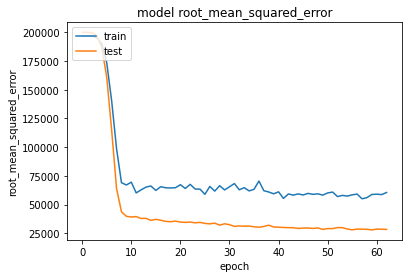

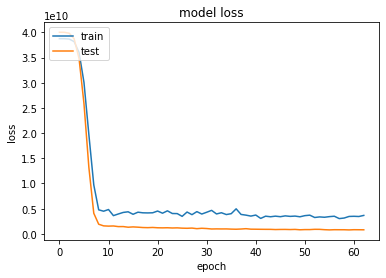

In [23]:
print(history.history.keys())
# summarize history for root_mean_squared_error
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()